#**BOSTON HOUSE PRICE PREDICTION**

###**CONCEPTS USED**

1) REGULARISED LINEAR REGRESSION

2) LEARNING CURVES

3) BIAS VS VARIANCE

4) POLYNOMIAL REGRESSION



##**DATA DESCRIPTION**

The Boston data frame has **506 rows** and **14 columns**.

This data frame contains the following columns:

**crim** - per capita crime rate by town.

**zn** - proportion of residential land zoned for lots over 25,000 sq.ft.

**indus** - proportion of non-retail business acres per town.

**chas** - Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).

**nox** - nitrogen oxides concentration (parts per 10 million).

**rm** - average number of rooms per dwelling.

**age** - proportion of owner-occupied units built prior to 1940.

**dis** - weighted mean of distances to five Boston employment centres.

**rad** - index of accessibility to radial highways.

**tax** - full-value property-tax rate per \$10,000.

**ptratio** - pupil-teacher ratio by town.

**black** - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.

**lstat** - lower status of the population (percent).

**medv** - median value of owner-occupied homes in \$1000s.

The medv variable is the target variable.

In [0]:
# importing essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from google.colab import files
uploaded=files.upload()

Saving Boston.csv to Boston.csv


In [0]:
data=pd.read_csv('Boston.csv')

In [4]:
data.columns

Index(['Unnamed: 0', 'crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis',
       'rad', 'tax', 'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')

In [5]:
data.shape

(506, 15)

In [7]:
data.head(20)

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,6,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,8,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,9,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,10,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


In [0]:
x=data.iloc[:,[1,5,6,7,8,11,13]]
y=data['medv']

##**APPLYING LINEAR REGRESSION**

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1)
reg=LinearRegression()
reg.fit(x_train,y_train)
pred=reg.predict(x_test)

In [30]:
from sklearn.metrics import r2_score
print(r2_score(y_test,pred))

0.754564799990992


#**TEST SCORE = 75.45%**

In [31]:
df=pd.DataFrame({'Actual':y_test,'Predicted':pred})
df

,Actual,Predicted
307,28.2,29.889289
343,23.9,27.312737
47,16.6,18.789439
67,22.0,23.134680
362,20.8,17.206345
...,...,...
41,26.6,29.316198
361,19.9,17.863502
289,24.8,26.204786
498,21.2,22.110609


This shows that Linear Regression is not a good fit for the data.

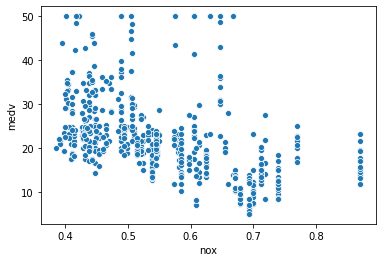

In [13]:
import seaborn as sns
sns.scatterplot(data['nox'],y)

##**LEARNING CURVES**

In [0]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, validation_scores = learning_curve(estimator = LinearRegression() , X=x , y=y,cv=5, random_state=0,
                                                              train_sizes= np.linspace(0.1,1.0,3),scoring ='neg_mean_squared_error')

In [0]:
train_scores_mean = -train_scores.mean(axis=1)
validation_scores_mean = -validation_scores.mean(axis=1)

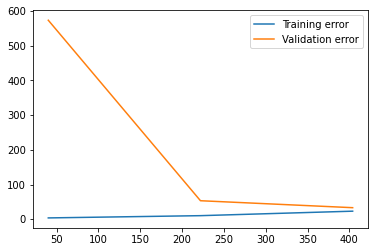

In [35]:
plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
plt.legend()

###This learning curve shows that data has **HIGH BIAS** (underfitting) problem. And Linear regression model poorly fits the dataset. 

In [0]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25, random_state=1)

#**POLYNOMIAL REGRESSION**

In [37]:
from sklearn.preprocessing import PolynomialFeatures
pf=PolynomialFeatures(degree=2)
x_poly = pf.fit_transform(x_train)
regg=LinearRegression()
regg.fit(x_poly,y_train)
pred_p=regg.predict(pf.fit_transform(x_test))
print(r2_score(y_test,pred_p))  

0.8256977136518737


In [38]:
df=pd.DataFrame({'Actual':y_test,'Predicted':pred_p})
df

,Actual,Predicted
307,28.2,29.856372
343,23.9,25.694008
47,16.6,17.858269
67,22.0,18.606869
362,20.8,29.514169
...,...,...
92,22.9,26.822832
224,44.8,41.423521
110,21.7,21.476218
426,10.2,19.524968


#**TEST SCORE =  82.57%**